

---

**DEPENDENCIES**

---



In [ ]:
!pip install gensim



---

**IMPORTS**

---



In [ ]:
import warnings
import numpy as np
import pandas as pd
from scipy import spatial
from sklearn import cluster
from sklearn import metrics
import gensim.downloader as api
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText

warnings.filterwarnings('ignore')



---

**WORD2VEC MODEL**

---



In [53]:
w2v = api.load('fasttext-wiki-news-subwords-300')



---

**WORD EMBEDDINGS** (Word2Vec)

---



In [54]:
words_list = [["space"], ["languages"], ["geography"],	["easter"],	["cryptocurrency"],	["chemistry"], ["Internet"],	["social networks"], ["ancient Rome"],	["ships"], ["electricity"], ["ancient world"], ["geology"], ["religion"], ["travel"], ["memes"], ["education"], ["education"], ["vaccinations"],	["computers"], ["flu"], ["google"],	["browsers"],	["games"], ["easter eggs"], ["search engines"],	["English"], ["ancient Greece"], ["health"], ["smartphones"], ["psychology"],	["psychotherapy"]]

In [168]:
words = [word[0] for word in words_list if word[0] in w2v.wv]
X = np.array([w2v.wv[word[0]] for word in words])

In [169]:
w2v_mapping = {}
for i in range(len(X)):
  w2v_mapping[tuple(X[i])] = words[i]



---

**VISUALIZATION USING PCA & t-SNE**

---



In [170]:
def visualize_embeddings(result, method_name, words):
  plt.title(method_name)
  plt.scatter(result[:, 0], result[:, 1])

  for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))
  plt.show()

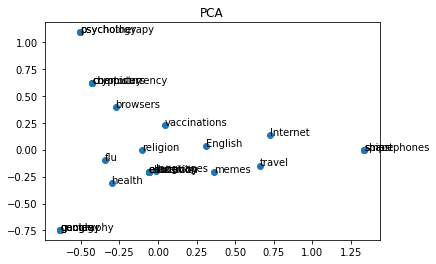

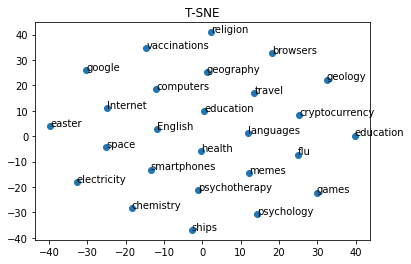

In [171]:
pca = PCA(n_components=5)
tsne = TSNE(n_components=2)
result_pca = pca.fit_transform(X)
result_tsne = tsne.fit_transform(X)

visualize_embeddings(result_pca, 'PCA', words)
visualize_embeddings(result_tsne, 'T-SNE', words)



---

**CLUSTERING USING K-MEANS & OPTICS**

---



In [172]:
def visualize_clusters(dim_reduction, clustering_method, method_name, words):
  plt.figure(figsize=(18,6))
  plt.subplot(1, 2, 1)
  plt.title(method_name)
  plt.scatter(dim_reduction[:, 0], dim_reduction[:, 1], c=clustering_method.labels_)
  plt.subplot(1, 2, 2)
  plt.title(method_name)
  plt.scatter(dim_reduction[:, 0], dim_reduction[:, 1], c=clustering_method.labels_)

  for i, word in enumerate(words):
      plt.annotate(word, xy=(dim_reduction[i, 0], dim_reduction[i, 1]))
  plt.show()

In [205]:
kmeans = cluster.KMeans(n_clusters=4).fit(result_pca)
optics = cluster.OPTICS(min_cluster_size=0.14, min_samples=2).fit(result_pca)

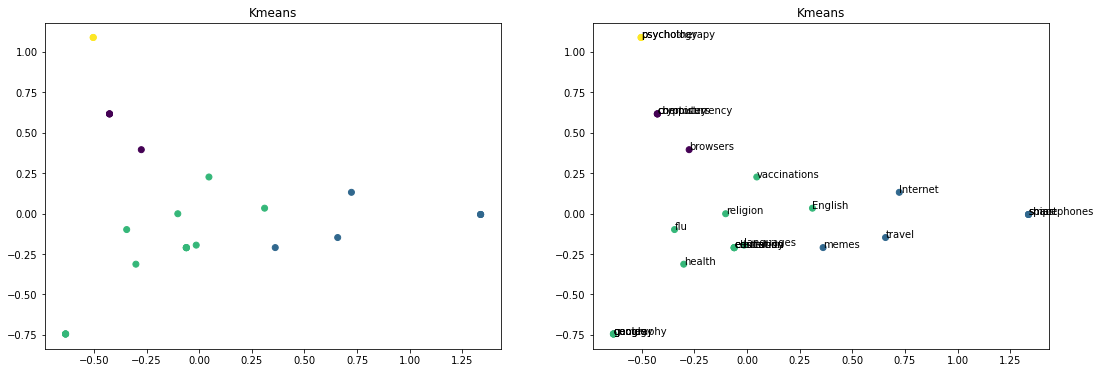

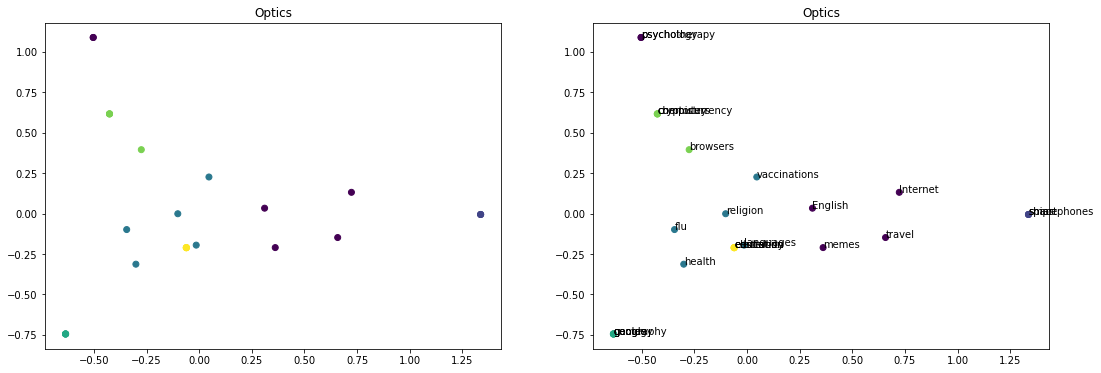

In [206]:
visualize_clusters(result_pca, kmeans, 'Kmeans', words)
visualize_clusters(result_pca, optics, 'Optics', words)



---

**CLUSTERING CHARACTERISTICS & DETAILS** 


*   Dunn index, DB index and silhouette scores
*   Cluster centroid (vector)
*   All subscriptions of a cluster
*   Closest word for centroid
*   Within Cluster variance

---



In [207]:
centroid_kmeans = kmeans.cluster_centers_
labels_kmeans, counts_kmeans = np.unique(kmeans.labels_[kmeans.labels_>=0], return_counts=True)

silhouette_kmeans = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
silhouette_optics = metrics.silhouette_score(X, optics.labels_, metric='euclidean')

db_kmeans = metrics.davies_bouldin_score(X, kmeans.labels_)
db_optics = metrics.davies_bouldin_score(X, optics.labels_)

In [208]:
# SCORES

print('- Silhouette Kmeans: ' + str(silhouette_kmeans))
print('- Silhouette Optics: ' + str(silhouette_optics))
print('\n')
print('- Davies Bouldin Kmeans: ' + str(db_kmeans))
print('- Davies Bouldin Optics: ' + str(db_optics))

- Silhouette Kmeans: 0.3237734
- Silhouette Optics: 0.48335394


- Davies Bouldin Kmeans: 1.2449963288899168
- Davies Bouldin Optics: 1.5825464759752623


In [209]:
# CLUSTER DETAILS

closest, _ = metrics.pairwise_distances_argmin_min(kmeans.cluster_centers_, result_pca)

for label in labels_kmeans:
  print('\nCluster ' + str(label) + ':\n')
  print('- Centroid: ', centroid_kmeans[label])
  entries = X[np.where(kmeans.labels_ == label)[0]]
  to_words = [w2v_mapping[tuple(e)] for e in entries]
  print('- Subscriptions: ', to_words)
  closest_word = w2v_mapping[tuple(X[closest[label]])]
  print('- Closest to Centroid: ', closest_word)
  print('- Variance of Cluster: ', np.var(entries))


Cluster 0:

- Centroid:  [-0.3886173   0.5607918  -0.7027303  -0.32986075 -0.05199187]
- Subscriptions:  ['computers', 'computers', 'computers', 'browsers']
- Closest to Centroid:  computers
- Variance of Cluster:  0.027059745

Cluster 1:

- Centroid:  [ 0.95886904 -0.04096894  0.03035443 -0.27861056  0.11315131]
- Subscriptions:  ['smartphones', 'Internet', 'smartphones', 'travel', 'memes', 'smartphones']
- Closest to Centroid:  smartphones
- Variance of Cluster:  0.022118479

Cluster 2:

- Centroid:  [-0.22794662 -0.298201    0.05263595  0.20341636 -0.01374119]
- Subscriptions:  ['languages', 'games', 'education', 'education', 'games', 'religion', 'education', 'education', 'vaccinations', 'flu', 'games', 'games', 'English', 'health']
- Closest to Centroid:  health
- Variance of Cluster:  0.02418107

Cluster 3:

- Centroid:  [-0.5037459   1.0887308   0.9459464   0.07163785 -0.13928191]
- Subscriptions:  ['psychotherapy', 'psychotherapy']
- Closest to Centroid:  psychotherapy
- Varian